In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
plt.style.use('seaborn-white')

<ipython-input-1-6d0fa4db7acd>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
import morl
from env_DeepSeaTreasure import DeepSeaTreasure

# convex = True
use_B = False

beta = 4.0

In [3]:
def main(n_rep: int):
    for i in range(1, 1 + n_rep):
        
        np.random.seed(i)
        
        policy = morl.make_policy_net(state_dim=2, 
                                      hidden_dim=36, 
                                      act_space=('discrete', 4), 
                                      c_dim=3, 
                                      seed=i,
                                      embed_dims=None).to(morl.DEVICE)
        
        out = morl.learn(policy=policy, 
                         gradient_steps=50, 
                         n_grad_repeat=1, 
                         group_size_train=400, 
                         group_size_test=400, 
                         env=DeepSeaTreasure(convex=True, noise_std=0.03, normalizer=lambda x: x / 4.0), 
                         n_obj=2, 
                         test_repeat=1, 
                         n_jobs=20, 
                         ep_len_train=50, 
                         ep_len_test=50, 
                         nn_k=10, 
                         beta=4.0, 
                         J_AU=np.array([0.0, -19.0]), 
                         J_U=np.array([0.0, -19.0]) + 1, 
                         gamma_train=0.99, 
                         gamma_test=0.99, 
                         mode='maxmin', 
                         score_clipped_above_zero=True,
                         use_QV=False, 
                         QV_params=None
                        )
        with open('out_DST_{}.pkl'.format(i), 'wb') as f:
            pickle.dump(out, f)

In [4]:
%%time
main(5)

0 [233.8] 1 [230.7] 2 [240.6] 3 [239.7] 4 [241.7] 5 [236.0] 6 [240.6] 7 [236.0] 8 [241.7] 9 [241.7] 10 [241.7] 11 [241.7] 12 [241.7] 13 [241.7] 14 [241.7] 15 [241.7] 16 [241.7] 17 [241.7] 18 [241.7] 19 [241.7] 20 [241.7] 21 [237.7] 22 [241.7] 23 [240.6] 24 [241.7] 25 [241.7] 26 [240.6] 27 [241.7] 28 [241.7] 29 [241.7] 30 [240.6] 31 [240.6] 32 [241.7] 33 [241.7] 34 [240.6] 35 [241.7] 36 [241.7] 37 [241.7] 38 [241.7] 39 [241.7] 40 [241.7] 41 [241.7] 42 [241.7] 43 [241.7] 44 [241.7] 45 [227.6] 46 [241.7] 47 [241.7] 48 [241.7] 49 [227.6] 50 [227.6] 0 [130.2] 1 [172.6] 2 [172.6] 3 [190.2] 4 [220.6] 5 [216.9] 6 [233.9] 7 [236.8] 8 [240.6] 9 [240.6] 10 [241.7] 11 [239.5] 12 [239.6] 13 [240.6] 14 [239.5] 15 [241.7] 16 [239.5] 17 [241.7] 18 [241.7] 19 [241.7] 20 [241.7] 21 [241.7] 22 [241.7] 23 [241.7] 24 [241.7] 25 [241.7] 26 [241.7] 27 [241.7] 28 [241.7] 29 [241.7] 30 [241.7] 31 [241.7] 32 [241.7] 33 [241.7] 34 [241.7] 35 [241.7] 36 [241.7] 37 [241.7] 38 [241.7] 39 [241.7] 40 [241.7] 41 [241.

In [70]:
outs = []
for i in range(1, 6):
    with open('out_DST_{}.pkl'.format(i), 'rb') as f:
        outs += [pickle.load(f)]

In [71]:
[np.max(outs[i][0][:20]) for i in range(5)]

[241.73308949761335,
 241.73308949761335,
 241.73308949761335,
 241.73308949761335,
 241.73308949761335]

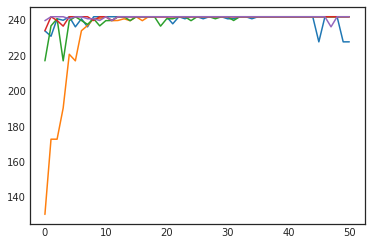

In [10]:
for i in range(5):
    plt.plot(outs[i][0])

In [76]:
_o = np.asarray([outs[i][0] for i in range(5)])

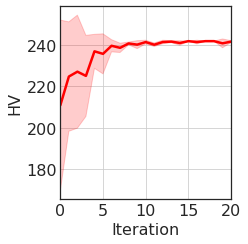

In [77]:
plt.figure(figsize=(3.55, 3.5))
plt.xlim(0, 20)
plt.xticks([0, 5, 10, 15, 20])
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=16)
plt.xlabel('Iteration', fontsize=16)
plt.plot(_o.mean(axis=0), c='r', lw=2.5)
plt.fill_between(np.arange(51), 
                 _o.mean(axis=0) - _o.std(axis=0), 
                 _o.mean(axis=0) + _o.std(axis=0), alpha=0.2, color='r')
plt.tight_layout()
# plt.savefig('learning_dst_convex.png', dpi=400)

beta = 0.0

In [65]:
def main(n_rep: int):
    for i in range(1, 1 + n_rep):
        
        np.random.seed(i)
        
        policy = morl.make_policy_net(state_dim=2, 
                                      hidden_dim=36, 
                                      act_space=('discrete', 4), 
                                      c_dim=3, 
                                      seed=i,
                                      embed_dims=None).to(morl.DEVICE)
        
        out = morl.learn(policy=policy, 
                         gradient_steps=50, 
                         n_grad_repeat=1, 
                         group_size_train=400, 
                         group_size_test=400, 
                         env=DeepSeaTreasure(convex=True, noise_std=0.03, normalizer=lambda x: x / 4.0), 
                         n_obj=2, 
                         test_repeat=1, 
                         n_jobs=20, 
                         ep_len_train=50, 
                         ep_len_test=50, 
                         nn_k=10, 
                         beta=0.0, 
                         J_AU=np.array([0.0, -19.0]), 
                         J_U=np.array([0.0, -19.0]) + 1, 
                         gamma_train=0.99, 
                         gamma_test=0.99, 
                         mode='maxmin', 
                         score_clipped_above_zero=True,
                         use_QV=False, 
                         QV_params=None
                        )
        with open('out_DST_beta=0_{}.pkl'.format(i), 'wb') as f:
            pickle.dump(out, f)

In [66]:
%%time
main(5)

0 [234.9] 1 [239.5] 2 [224.2] 3 [234.2] 4 [239.5] 5 [237.8] 6 [238.4] 7 [210.1] 8 [237.6] 9 [236.4] 10 [208.8] 11 [212.4] 12 [199.1] 13 [193.0] 14 [172.6] 15 [130.2] 16 [130.8] 17 [214.9] 18 [164.9] 19 [130.2] 20 [43.45] 21 [130.2] 22 [130.2] 23 [12.6] 24 [176.1] 25 [12.6] 26 [130.2] 27 [12.6] 28 [12.6] 29 [130.2] 30 [130.2] 31 [12.6] 32 [12.6] 33 [130.2] 34 [12.6] 35 [12.6] 36 [130.2] 37 [12.6] 38 [12.6] 39 [12.6] 40 [12.6] 41 [12.6] 42 [12.6] 43 [12.6] 44 [12.6] 45 [130.2] 46 [12.6] 47 [12.6] 48 [12.6] 49 [12.6] 50 [12.6] 0 [130.2] 1 [130.2] 2 [12.6] 3 [12.6] 4 [12.6] 5 [12.6] 6 [12.6] 7 [12.6] 8 [12.6] 9 [12.6] 10 [12.6] 11 [12.6] 12 [12.6] 13 [12.6] 14 [12.6] 15 [12.6] 16 [12.6] 17 [12.6] 18 [12.6] 19 [12.6] 20 [12.6] 21 [12.6] 22 [12.6] 23 [12.6] 24 [12.6] 25 [12.6] 26 [12.6] 27 [12.6] 28 [12.6] 29 [12.6] 30 [12.6] 31 [12.6] 32 [12.6] 33 [12.6] 34 [12.6] 35 [12.6] 36 [12.6] 37 [12.6] 38 [12.6] 39 [12.6] 40 [12.6] 41 [12.6] 42 [12.6] 43 [12.6] 44 [12.6] 45 [12.6] 46 [12.6] 47 [12.6

In [72]:
outs_0 = []
for i in range(1, 6):
    with open('out_DST_beta=0_{}.pkl'.format(i), 'rb') as f:
        outs_0 += [pickle.load(f)]

In [73]:
[np.max(outs_0[i][0][:20]) for i in range(5)]

[239.52924988468203,
 130.208490918,
 239.7682409918071,
 236.44520748353716,
 241.73308949761335]

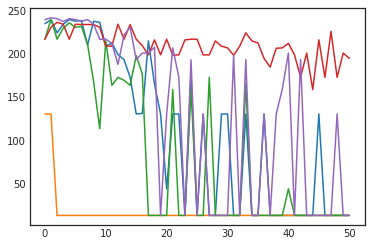

In [74]:
for i in range(5):
    plt.plot(outs_0[i][0])

In [78]:
_o0 = np.asarray([outs_0[i][0] for i in range(5)])

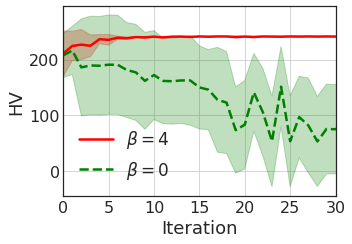

In [96]:
plt.figure(figsize=(5, 3.5))
plt.xlim(0, 30)
plt.xticks(np.arange(0, 31, 5))
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=18)
plt.xlabel('Iteration', fontsize=18)

plt.plot(_o.mean(axis=0), c='r', lw=2.5, label=r'$\beta=4$')
plt.fill_between(np.arange(51), 
                 _o.mean(axis=0) - _o.std(axis=0), 
                 _o.mean(axis=0) + _o.std(axis=0), alpha=0.25, color='r')

plt.plot(_o0.mean(axis=0), c='g', lw=2.5, ls='--', label=r'$\beta=0$')
plt.fill_between(np.arange(51), 
                 _o0.mean(axis=0) - _o0.std(axis=0), 
                 _o0.mean(axis=0) + _o0.std(axis=0), alpha=0.25, color='g')

plt.tight_layout()
plt.legend(fontsize=17)
# plt.savefig('learning_dst_convex.png', dpi=400)